#**Data Analysis for Optimal Plant Growth in Your Mini Smart Greenhouse System**
##**Empowering Your Plant with Data-Driven Decisions!**


Planting in a controlled environment requires a delicate balance of light, soil, and air conditions. This sophisticated data analysis pipeline is designed to analyse the data collected by your Mini Smart Greenhouse System, then offer you a comprehensive overview of the environmental factors affecting your plants. By comparing this week's performance with the previous, you will gain actionable insights to fine-tune your system's thresholds for better plant growth! <br> <br>

###**Steps To Start Maximizing Your Greenhouse's Potential:**
1. **Initial Setup:** Begin by customizing the variable in Section 0 to suit your specific needs
2. **Data Importation:** Import your collected data in Section 1 to prepare for analysis.  
3. **Effortless Exeution:** Navigate to "Runtime" and select "Run all" to activate the pipeline and follow the instructions to select your data range.
4. **Relax and Reflect:** Just sit back and watch while the automated process analysing your data into digestible insight. Once complete, the pipeline will provide you with a detail report to help you for your greenhouse adjustment.

By using this pipeline, you will not only optimize your greenhouse growing environment but also deepen your understanding on your plant. Ready to harness the power of data analysis for better plant growth?

##**Let's Get Growing!**

##**Section 0: Preparing Your Analysis Environment**
Setting up a right environment is the key to successful data analysis. In this section, we'll ensure that your enviornment is equipped with all the necessary tools and libraries.

#### **Set Up Library:**
No need to change the default setting.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import requests

#### **Set Up Your Variables:**
Customize the following variables to match your actual values. Proper configuration ensures that the data analysis reflects the specific conditions of your Mini Smart Greenhouse System.

*   **API Key for Weather API:** <br>
To access weather data, please register for a free account at https://www.weatherapi.com. Follow their instructions to obtain your unique API key. The **free plan** is enough for the purposes of this analysis.

*   **Postal code:** <br>
Enter the postal code for the location of your Mini Smart Greenhouse System. This ensures that the weather data corresponds to your specific area. If you need help finding your postal code, visit https://www.royalmail.com/find-a-postcode.

* **Effective Sunlight Threshold:** <br>
Set this variable to the effective sunlight threshold specific to your system. The default value is 1000 lux, but you may need to adjust this depending on the lighting conditions at your location.





In [3]:
api_key = "ae543036583d404780e00747241004" # API key for weather API
postal_code = "SO17 1BJ"  # UK postal code of B53
effective_sunlight_threshold = 1000 # The minimum sunlight intensity to consider as effective sunlight for the plant

## **Section 1: Import Your Dataset** <br>
Importing the correct dataset is crucial for accurate analysis. Follow these steps to upload and configure your data files in Google Colab.

1.   **Download and Prepare Your Data:** <br>
After downloading the system report from the Blynk online dashboard, you will receive a zip file containing **CSV files for your system data and events.** Extract this zip file on your local machine.
2.   **Upload to Google Drive:** <br>
Upload the extracted CSV files to your Google Drive. This makes them accessible from Google Colab.
3.   **Connect Google Drive to Google Colab:** <br>
To access these files in Google Colab, **you must mount your Google Drive in the Colab environment**. You can find detailed instructions on how to do this here: https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj.

4.   **Set the File Paths:** <br>
Once your Google Drive is accessible from Colab, navigate to the uploaded CSV files in the Colab file explorer. Right-click on each file and select 'Copy path' to get the file path. Replace the placeholders below with the actual paths to your dataset files:

In [4]:
def load_and_prepare_data(filepath):
    data = pd.read_csv(filepath)
    data = data.sort_values(by='Time', ascending=True)
    data = data.reset_index(drop=True)
    data['Time'] = pd.to_datetime(data['Time'])

    return data
raw_system_data = load_and_prepare_data('path_to_your_system_data.csv')
raw_system_events = load_and_prepare_data('path_to_your_events_data.csv')

### **1.1: Check the Data Range Your Dataset**
Use the following cell to check the data range of your dataset.

In [5]:
def display_earliest_and_latest_dates(data):
    earliest_date = data['Time'].min()
    latest_date = data['Time'].max()

    print("Earliest date in the dataset:", earliest_date)
    print("Latest date in the dataset:", latest_date)

In [6]:
print("For System Data Dataset: ")
display_earliest_and_latest_dates(raw_system_data)

For System Data Dataset: 
Earliest date in the dataset: 2024-03-30 14:29:00
Latest date in the dataset: 2024-04-26 19:34:00


In [7]:
print("For System Events Dataset:")
display_earliest_and_latest_dates(raw_system_events)

For System Events Dataset:
Earliest date in the dataset: 2024-03-30 14:29:28
Latest date in the dataset: 2024-04-26 19:15:49


### **1.2: Select Data Range:** <br>
Sometimes not all of the dataset are useful, use the following cell to specify the **range of the data you are interested in analysing**. If you are not sure, just put the start date and end date of your dataset shown above.

**(Notice that only the last 14 days of data in the dataset will be analyzed.)**

In [8]:
def filter_data_by_date(data):
    global start_date, end_date
    while True:
        start_date = input("Enter the start date (YYYY-MM-DD): ")
        end_date = input("Enter the end date (YYYY-MM-DD): ")
        try:
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)

            if start_date > end_date:
                print("The start date must be before the end date. Please try again.")
                continue
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD format.")
            continue
        break

    filtered_data = data[(data['Time'] >= start_date) & (data['Time'] <= end_date)]
    print("Done")
    return filtered_data

In [9]:
print("Specify Data Range For System Data Dataset:")
system_data = filter_data_by_date(raw_system_data)

Specify Data Range For System Data Dataset:
Enter the start date (YYYY-MM-DD): 2024-03-30
Enter the end date (YYYY-MM-DD): 2024-04-26
Done


In [10]:
print("Specify Data Range For System Events Dataset:")
system_events = filter_data_by_date(raw_system_events)

Specify Data Range For System Events Dataset:
Enter the start date (YYYY-MM-DD): 2024-03-30
Enter the end date (YYYY-MM-DD): 2024-04-26
Done


### **1.3: Data Inspection** <br>
Before proceeding with your analysis, tale a brief look at the dataset to verify that you are working with **the correct datasets**. If the correct dataset is not displayed, double check that you have uploaded the correct dataset and copied the correct path in your google drive.

**Overview of System data**

In [11]:
system_data.head()

,Time,Air Humidity,Air Temperature,Soil Moisture,Soil Temperature,Water Tank Level,Light Intensity,Watering Duration,Water Pump Status,Heat Mat Status,LED Grow Light Status,LED Grow Light threshold,Lower Soil Temperature Threshold,Upper Soil Temperature Threshold,Lower Soil Moisture Threshold,Upper Soil Moisture Threshold,Water Hours,Water Minute,Desired Light Hours,System Status
0,2024-03-30 14:29:00,48.500000,24.500000,82.500000,20.859500,1.0,1108.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-30 14:32:00,47.333333,25.258333,83.225000,20.937818,1.0,614.333333,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-03-30 14:45:00,44.222222,26.833333,82.944444,21.097222,1.0,1058.666667,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-30 14:46:00,44.000000,27.100000,82.426923,21.108231,1.0,1044.846154,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-30 14:47:00,43.333333,27.100000,82.158824,21.126824,1.0,900.764706,NaN,NaN,0.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Overview of System Events**

In [12]:
system_events.head()

,Time,Event Type,Name,Description
0,2024-03-30 14:29:28,ONLINE,Online,NaN
1,2024-03-30 14:30:42,OFFLINE,Offline,NaN
2,2024-03-30 14:32:12,ONLINE,Online,NaN
3,2024-03-30 14:33:49,OFFLINE,Offline,NaN
4,2024-03-30 14:39:16,ONLINE,Online,NaN


##**Section 2: Data Preprocessing**
Effective data analysis starts with well-prepared data. In this section, we refine both the system data and events datasets to ensure their quality and usability for subsequent analyses. This preprocessing involves trimming unnecessary information, cleaning the data, handling missing values, and creating new features, which are critical steps to enhance data accuracy and relevance.

### **2.1: Data Reduction**
Reducing the dataset to relevant features eliminates unnecessary processing and focuses our analysis on data that directly impacts plant growth conditions.

**For System Data:**

In [13]:
cleaned_system_data = system_data.iloc[:, :11]
cleaned_system_data.head()

,Time,Air Humidity,Air Temperature,Soil Moisture,Soil Temperature,Water Tank Level,Light Intensity,Watering Duration,Water Pump Status,Heat Mat Status,LED Grow Light Status
0,2024-03-30 14:29:00,48.500000,24.500000,82.500000,20.859500,1.0,1108.000000,NaN,NaN,NaN,NaN
1,2024-03-30 14:32:00,47.333333,25.258333,83.225000,20.937818,1.0,614.333333,NaN,NaN,0.0,0.000000
2,2024-03-30 14:45:00,44.222222,26.833333,82.944444,21.097222,1.0,1058.666667,NaN,NaN,0.0,0.000000
3,2024-03-30 14:46:00,44.000000,27.100000,82.426923,21.108231,1.0,1044.846154,NaN,NaN,0.0,0.000000
4,2024-03-30 14:47:00,43.333333,27.100000,82.158824,21.126824,1.0,900.764706,NaN,NaN,0.0,0.166667


**For System Events:**

In [14]:
cleaned_system_events = system_events.iloc[:, :2]
cleaned_system_events.head()

,Time,Event Type
0,2024-03-30 14:29:28,ONLINE
1,2024-03-30 14:30:42,OFFLINE
2,2024-03-30 14:32:12,ONLINE
3,2024-03-30 14:33:49,OFFLINE
4,2024-03-30 14:39:16,ONLINE


### **2.2: Data Cleaning**
We remove any outliers or incorrect entries that may skew our analysis and handle the missing values in the dataset by imputation.

**For System Data:**

In [15]:
def system_data_cleaning(data):
    # Adjust the device status columns to be 0 or 1
    columns_to_adjust = ['Heat Mat Status', 'LED Grow Light Status']
    for column in columns_to_adjust:
        data[column] = data[column].apply(lambda x: 1 if x >= 1 else 0)

    data['Water Pump Status'] = data['Water Pump Status'].apply(lambda x: 1 if x > 0 else 0)

    #Replace NaN values with the median
    columns_to_replace_median = ['Air Humidity', 'Air Temperature', 'Soil Moisture',
                                 'Soil Temperature', 'Water Tank Level', 'Light Intensity',
                                 'Watering Duration']
    for column in columns_to_replace_median:
        if data[column].isnull().any():  # Check if there are any NaNs in the column
            median_value = data[column].median()
            data[column] = data[column].fillna(median_value)  # Replace NaNs with the median

    return data

cleaned_system_data = system_data_cleaning(cleaned_system_data)

In [16]:
cleaned_system_data.head()

,Time,Air Humidity,Air Temperature,Soil Moisture,Soil Temperature,Water Tank Level,Light Intensity,Watering Duration,Water Pump Status,Heat Mat Status,LED Grow Light Status
0,2024-03-30 14:29:00,48.500000,24.500000,82.500000,20.859500,1.0,1108.000000,1250.0,0,0,0
1,2024-03-30 14:32:00,47.333333,25.258333,83.225000,20.937818,1.0,614.333333,1250.0,0,0,0
2,2024-03-30 14:45:00,44.222222,26.833333,82.944444,21.097222,1.0,1058.666667,1250.0,0,0,0
3,2024-03-30 14:46:00,44.000000,27.100000,82.426923,21.108231,1.0,1044.846154,1250.0,0,0,0
4,2024-03-30 14:47:00,43.333333,27.100000,82.158824,21.126824,1.0,900.764706,1250.0,0,0,0


### **2.3: Feature Engineering**
We introduce new variables derived from existing data to provide deeper insights.

**For System Data**

In [17]:
def get_historical_weather(api_key, postal_code, start_date, end_date):
    base_url = "http://api.weatherapi.com/v1/history.json" # URL for the Weather API

    current_year = datetime.now().year
    start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
    end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

    weather_data_list = [] # List to store weather data

    # Loop through each date, fetching the weather data for each day within the date range
    while start_datetime <= end_datetime:
        formatted_date = start_datetime.strftime('%Y-%m-%d')
        params = {
            'key': api_key,
            'q': postal_code,
            'dt': formatted_date
        }

        # Make the API request
        response = requests.get(base_url, params=params)
        if response.status_code == 200: # Request is successful
            day_weather_data = response.json()
            hourly_forecasts = day_weather_data['forecast']['forecastday'][0]['hour']

            # Append weather data to the list
            for hourly_data in hourly_forecasts:
                weather_data_list.append({
                    'Time': hourly_data['time'],
                    'Condition': hourly_data['condition']['text']
                })
        # Increment by one day for next iteration
        start_datetime += timedelta(days=1)

    # Convert the list to a Dataframe
    weather_df = pd.DataFrame(weather_data_list)
    return weather_df

def fetch_weather_for_last_7_days(api_key, postal_code, df):
    df['Time'] = pd.to_datetime(df['Time'])
    end_date = df['Time'].max() # Last recorded time
    start_date = end_date - timedelta(days=6) # Get the start date as 6 days before the end date
    formatted_start_date = start_date.strftime('%Y-%m-%d')
    formatted_end_date = end_date.strftime('%Y-%m-%d')
    # Fetch weather data
    historical_weather_df = get_historical_weather(api_key, postal_code, formatted_start_date, formatted_end_date)
    return historical_weather_df

historical_weather = fetch_weather_for_last_7_days(api_key, postal_code, cleaned_system_data)

In [18]:
def merge_data(df1, df2):
    df1['Time'] = pd.to_datetime(df1['Time'])
    df2['Time'] = pd.to_datetime(df2['Time']).dt.floor('H')
    df1['Time_hour'] = df1['Time'].dt.floor('H')
    df2['Time'] = df2['Time'].dt.floor('H')
    merged_df = pd.merge(df1, df2, left_on='Time_hour', right_on='Time', how='left')
    merged_df.drop(['Time_hour', 'Time_y'], axis=1, inplace=True)
    merged_df.rename(columns={'Time_x': 'Time'}, inplace=True)
    return merged_df

cleaned_system_data = merge_data(cleaned_system_data, historical_weather)

In [19]:
cleaned_system_data['Effective Sunlight'] = (cleaned_system_data['Light Intensity'] >= effective_sunlight_threshold).astype(int)

**For System Events**

In [20]:
def calculate_offline_durations(data):
    data_reversed = data.iloc[::-1].copy()
    data_reversed['Next Online Time'] = data_reversed['Time'].where(data_reversed['Event Type'] == 'ONLINE').ffill()
    data = data_reversed.iloc[::-1].copy()
    data['Time Difference'] = data.apply(
        lambda row: row['Next Online Time'] - row['Time'] if row['Event Type'] == 'OFFLINE' else pd.NaT, axis=1
    )
    return data

cleaned_system_events = calculate_offline_durations(cleaned_system_events)
cleaned_system_events.head()


,Time,Event Type,Next Online Time,Time Difference
0,2024-03-30 14:29:28,ONLINE,2024-03-30 14:29:28,NaT
1,2024-03-30 14:30:42,OFFLINE,2024-03-30 14:32:12,0 days 00:01:30
2,2024-03-30 14:32:12,ONLINE,2024-03-30 14:32:12,NaT
3,2024-03-30 14:33:49,OFFLINE,2024-03-30 14:39:16,0 days 00:05:27
4,2024-03-30 14:39:16,ONLINE,2024-03-30 14:39:16,NaT


## **Section 3: System Data Analysis**
In this section, we focus on analyzing the key parameters that influence the growth conditions within your Mini Smart Greenhouse System. By examining the external weather conditions along with critical internal factors such as light, soil, and air conditions over the past two weeks, this analysis helps identify trends and make comparisons that are vital for optimizing plant health and growth in your system.

### **3.1: Weather Condition Analysis**
We start by visualizing the external weather conditions sourced from the weather API for the past 7 days to understand the climate your greenhouse is operating in.

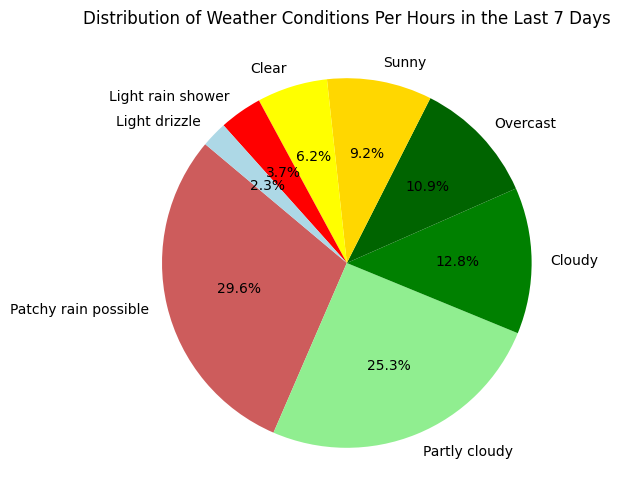

In [21]:
condition_colors = {
    'Sunny': 'gold',
    'Clear': 'yellow',
    'Overcast': 'darkgreen',
    'Cloudy': 'green',
    'Partly cloudy': 'lightgreen',
    'Light rain shower': 'red',
    'Light rain': 'darkred',
    'Patchy rain possible': 'indianred',
    'Light drizzle': 'lightblue',
    'Patchy light drizzle': 'skyblue'
}

def plot_weather_conditions_last_7_days(data):
    last_date = data['Time'].max()
    start_date = last_date - pd.Timedelta(days=6)
    last_7_days_data = data[(data['Time'] >= start_date) & (data['Time'] <= last_date) & (data['Condition'].notna())]
    condition_counts = last_7_days_data['Condition'].value_counts()

    pie_colors = [condition_colors.get(condition, 'gray') for condition in condition_counts.index]

    plt.figure(figsize=(8, 6))
    plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
    plt.title('Distribution of Weather Conditions Per Hours in the Last 7 Days')
    plt.show()

plot_weather_conditions_last_7_days(cleaned_system_data)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


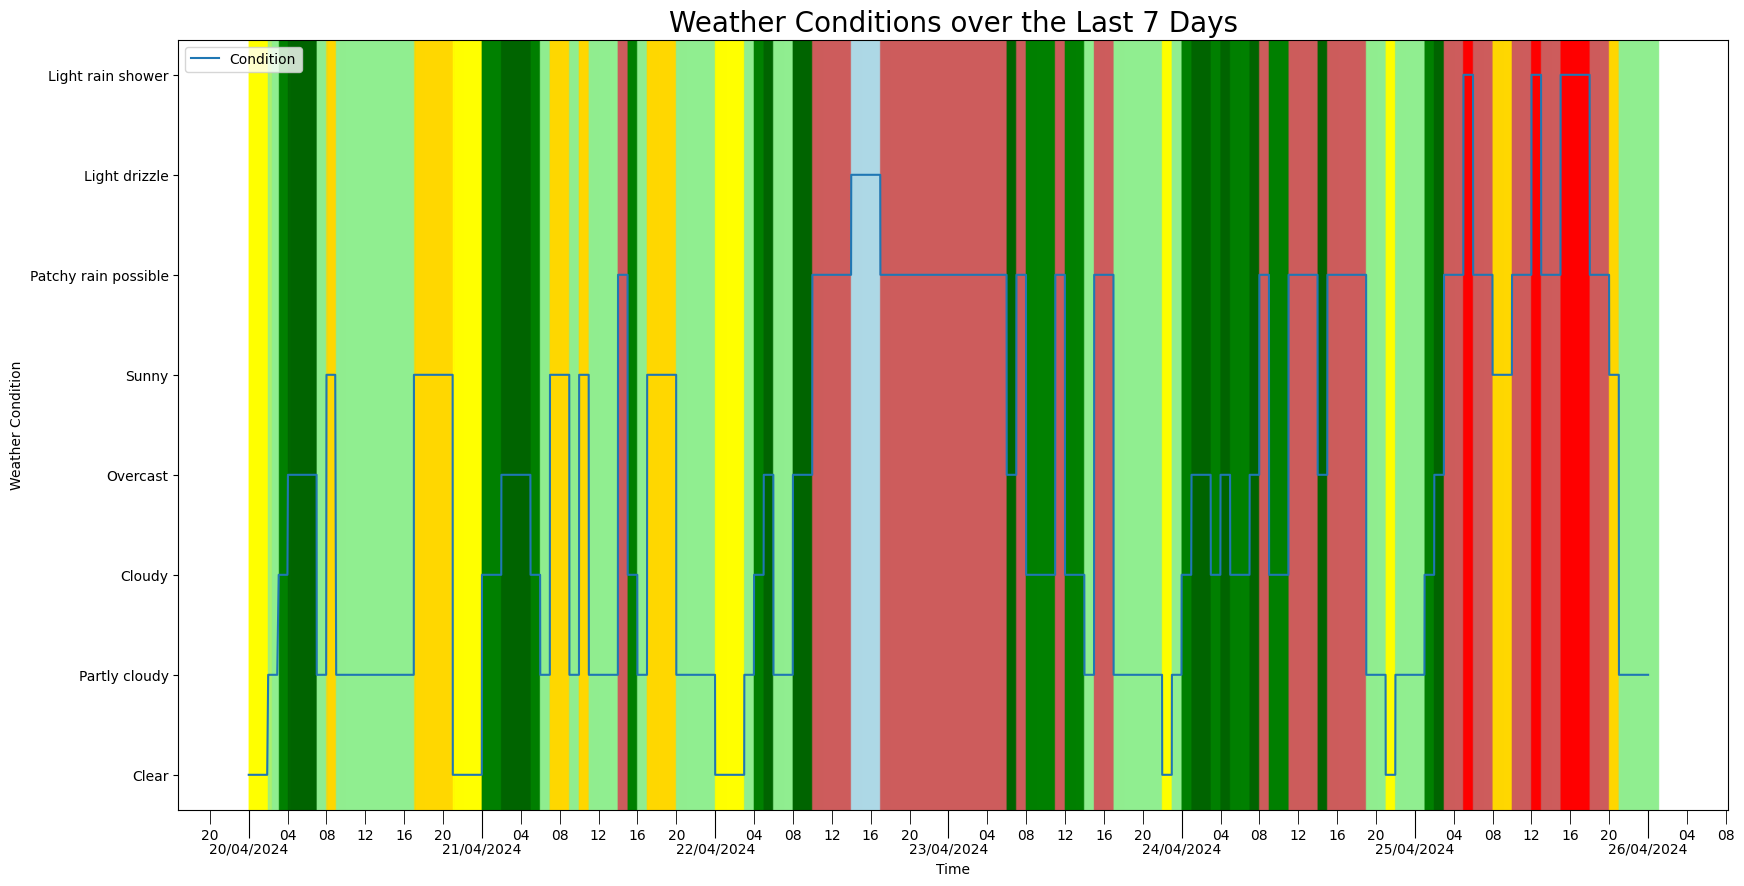

In [22]:
def plot_weather_timeline_with_conditions(data):
    data['Time'] = pd.to_datetime(data['Time'])
    data.sort_values('Time', inplace=True)

    # Determine data range
    last_date = data['Time'].max()
    start_date = last_date - pd.Timedelta(days=6)
    last_7_days_data = data[(data['Time'] >= start_date) & (data['Time'] <= last_date) & (data['Condition'].notna())].copy()
    fig, ax = plt.subplots(figsize=(20, 10))

    # Filter data to include only data for the last 7 days
    conditions = last_7_days_data['Condition'].unique()
    condition_mapping = {condition: i for i, condition in enumerate(conditions)}
    last_7_days_data.loc[:, 'Condition Mapped'] = last_7_days_data['Condition'].map(condition_mapping)

    # Plot weather data over time
    ax.plot(last_7_days_data['Time'], last_7_days_data['Condition Mapped'], label='Condition')

    for time, condition in zip(last_7_days_data['Time'], last_7_days_data['Condition']):
        ax.axvspan(time, time + pd.Timedelta(hours=1), color=condition_colors.get(condition, 'white'), alpha=0.5)

    # Set the major and minor ticks on the x-axis for dates and hours
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
    ax.tick_params(axis='x', which='major', length=20)
    ax.tick_params(axis='x', which='minor', length=10)

    plt.yticks(list(condition_mapping.values()), list(condition_mapping.keys()))

    plt.xlabel('Time')
    plt.ylabel('Weather Condition')
    plt.title('Weather Conditions over the Last 7 Days', fontsize=20)
    plt.legend()
    plt.show()

plot_weather_timeline_with_conditions(cleaned_system_data)


From the figure above, you can get a visual summary of the weather conditions over the last seven days:

*   **Yellow** indicates periods when the weather was sunny.

*   **Green** represents times when it was cloudy, encompassing various degrees of cloud cover.
*   **Blue** is used to show when there was drizzle, implying light precipitation.
*   **Red** marks time of rain, ranging from light showers to heavier rainfall








### **3.2: Light Conditions Analysis**
Light intensity levels are crucial for photosynthesis and overall plant health. We analyze the light exposure data collected from your system, comparing the average light intensity over the most recent 7 days against the previous 7 days.

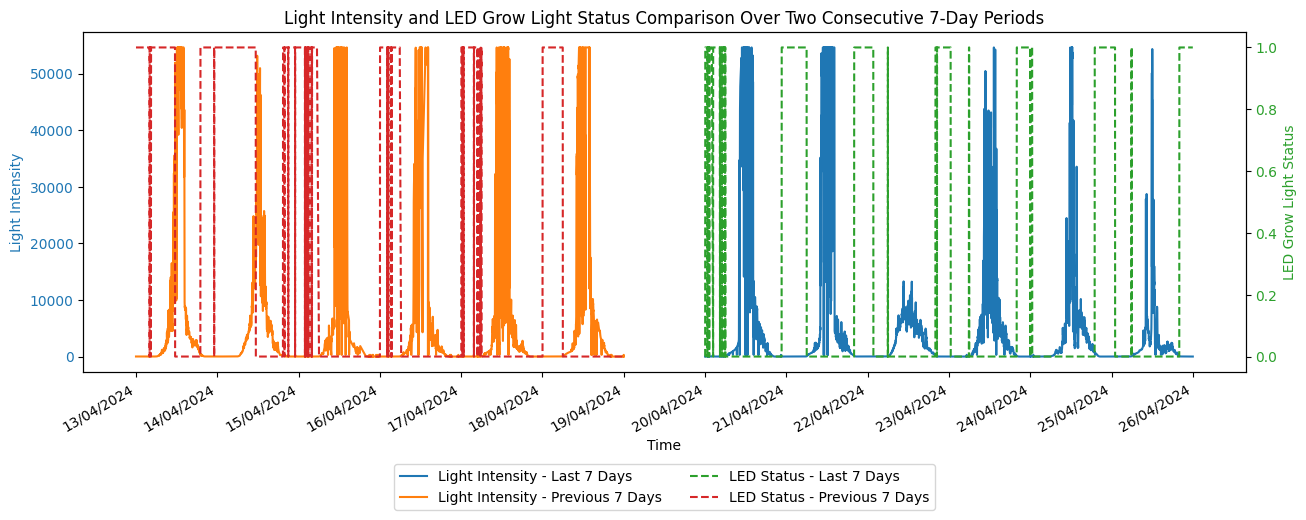

Average Effective Sunlight Hours per Day (Last 7 Days): 8.16 hours
Average LED Grow Light On Duration per Day (Last 7 Days): 4.95 hours
Average Effective Sunlight Hours per Day (Previous 7 Days): 6.60 hours
Average LED Grow Light On Duration per Day (Previous 7 Days): 6.71 hours

Conclusion:
The average effective sunlight hours per day increased by 1.57 hours compared to the previous week.
The average LED grow light on duration per day decreased by 1.75 hours compared to the previous week.


In [23]:
def plot_light_conditions_summary(data):
    data['Time'] = pd.to_datetime(data['Time'])
    data.sort_values('Time', inplace=True)

    # Determine the time range for the last 7 days and the 7 days prior to that
    last_date = data['Time'].max()
    start_date_last_7_days = last_date - pd.Timedelta(days=6)
    start_date_last_last_7_days = start_date_last_7_days - pd.Timedelta(days=7)
    end_date_last_last_7_days = start_date_last_7_days - pd.Timedelta(days=1)

    # Filter the data for these time ranges
    last_7_days_data = data[(data['Time'] >= start_date_last_7_days) & (data['Time'] <= last_date)].copy()
    last_last_7_days_data = data[(data['Time'] >= start_date_last_last_7_days) & (data['Time'] <= end_date_last_last_7_days)].copy()

    # Calculate average effective sunlight hours and LED on time
    def calculate_averages(data):
        data['Date'] = data['Time'].dt.date
        effective_sunlight_minutes = data.groupby('Date')['Effective Sunlight'].sum()
        led_on_minutes = data.groupby('Date')['LED Grow Light Status'].sum()
        avg_effective_sunlight_hours = (effective_sunlight_minutes / 60).mean()
        avg_led_on_hours = (led_on_minutes / 60).mean()
        return avg_effective_sunlight_hours, avg_led_on_hours

    avg_sunlight_last_7, avg_led_last_7 = calculate_averages(last_7_days_data)
    avg_sunlight_last_last_7, avg_led_last_last_7 = calculate_averages(last_last_7_days_data)

    # Plot light intensity graph
    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax1.plot(last_7_days_data['Time'], last_7_days_data['Light Intensity'], label='Light Intensity - Last 7 Days', color='tab:blue')
    ax1.plot(last_last_7_days_data['Time'], last_last_7_days_data['Light Intensity'], label='Light Intensity - Previous 7 Days', color='tab:orange')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Light Intensity', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.gcf().autofmt_xdate()

    # Create another axis for the LED grow light status
    ax2 = ax1.twinx()
    ax2.plot(last_7_days_data['Time'], last_7_days_data['LED Grow Light Status'], label='LED Status - Last 7 Days', color='tab:green', linestyle='--')
    ax2.plot(last_last_7_days_data['Time'], last_last_7_days_data['LED Grow Light Status'], label='LED Status - Previous 7 Days', color='tab:red', linestyle='--')
    ax2.set_ylabel('LED Grow Light Status', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Adding legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

    plt.title('Light Intensity and LED Grow Light Status Comparison Over Two Consecutive 7-Day Periods')
    plt.show()

    # Calculate change
    sunlight_change = avg_sunlight_last_7 - avg_sunlight_last_last_7
    led_change = avg_led_last_7 - avg_led_last_last_7
    sunlight_conclusion = (f"The average effective sunlight hours per day {'increased' if sunlight_change > 0 else 'decreased'} "
                       f"by {abs(sunlight_change):.2f} hours compared to the previous week.")
    led_conclusion = (f"The average LED grow light on duration per day {'increased' if led_change > 0 else 'decreased'} "
                  f"by {abs(led_change):.2f} hours compared to the previous week.")

    print(f'Average Effective Sunlight Hours per Day (Last 7 Days): {avg_sunlight_last_7:.2f} hours')
    print(f'Average LED Grow Light On Duration per Day (Last 7 Days): {avg_led_last_7:.2f} hours')
    print(f'Average Effective Sunlight Hours per Day (Previous 7 Days): {avg_sunlight_last_last_7:.2f} hours')
    print(f'Average LED Grow Light On Duration per Day (Previous 7 Days): {avg_led_last_last_7:.2f} hours')
    print("\nConclusion:")
    print(sunlight_conclusion)
    print(led_conclusion)

plot_light_conditions_summary(cleaned_system_data)


### **3.3: Soil Conditon Analysis**
Soil moisture and temperature are key indicators of soil health, which directly affects plant root development and nutrient uptake. This analysis compares daily averages and fluctuations over the most recent 7 days against the previous 7 days.

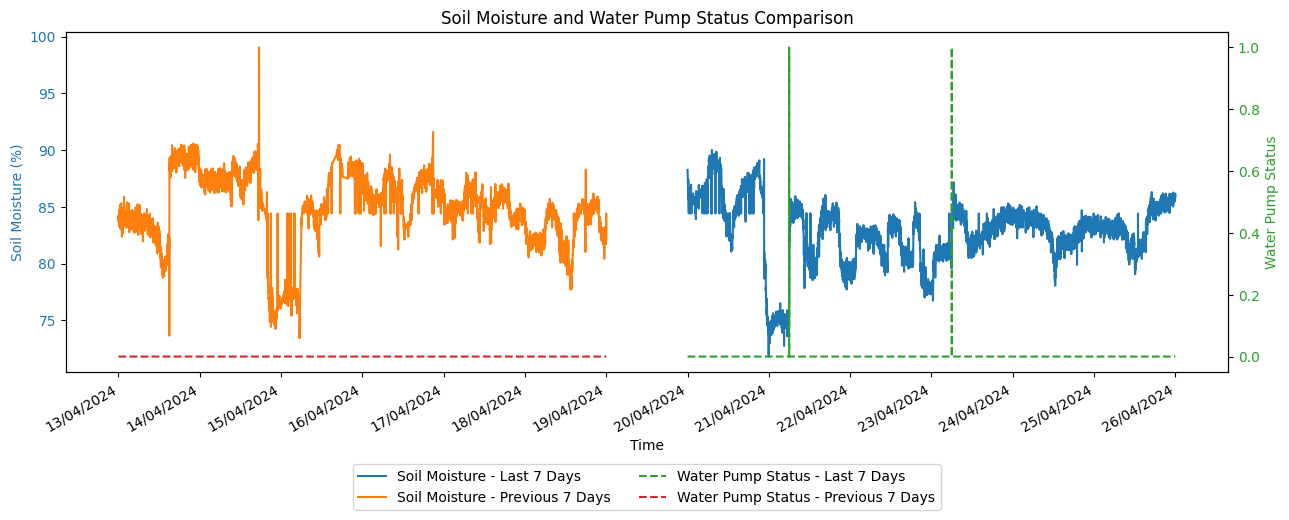

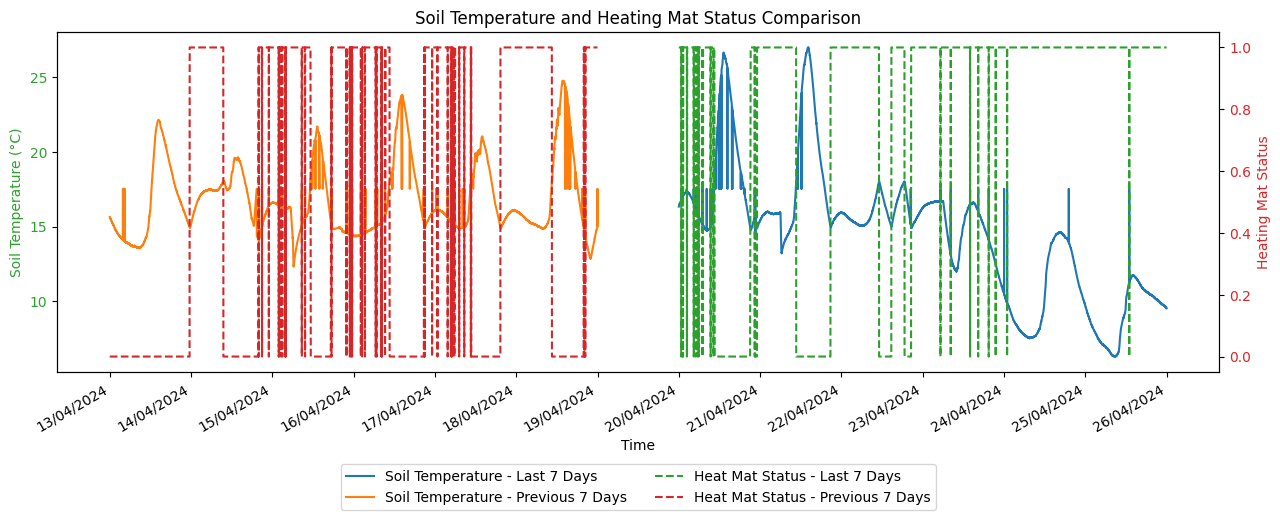

Average Soil Moisture (Last 7 Days): 82.62%
Average Soil Moisture (Previous 7 Days): 84.98%
Average Soil Temperature (Last 7 Days): 14.22°C
Average Soil Temperature (Previous 7 Days): 16.74°C
Average Heating Mat On Duration (Last 7 Days): 15.65 hours
Average Heating Mat On Duration (Previous 7 Days): 7.96 hours

Conclusion:
The average soil moisture decreased by 2.36% compared to the previous week.
The average soil temperature decreased by 2.52°C compared to the previous week.
The average heating mat on duration increased by 7.69 hours compared to the previous week.


In [32]:
def plot_soil_conditions_summary(data):
    data['Time'] = pd.to_datetime(data['Time'])
    data.sort_values('Time', inplace=True)

    # Calculate the start and end dates for the last 7 days and the 7 days prior that
    last_date = data['Time'].max()
    start_last_7_days = last_date - pd.Timedelta(days=6)
    start_last_last_7_days = start_last_7_days - pd.Timedelta(days=7)
    end_last_last_7_days = start_last_7_days - pd.Timedelta(days=1)

    # Filter data
    last_7_days_data = data[(data['Time'] >= start_last_7_days) & (data['Time'] <= last_date)].copy()
    last_last_7_days_data = data[(data['Time'] >= start_last_last_7_days) & (data['Time'] <= end_last_last_7_days)].copy()

    # Plotting soil moisture and water pump status
    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax1.plot(last_7_days_data['Time'], last_7_days_data['Soil Moisture'], label='Soil Moisture - Last 7 Days', color='tab:blue')
    ax1.plot(last_last_7_days_data['Time'], last_last_7_days_data['Soil Moisture'], label='Soil Moisture - Previous 7 Days', color='tab:orange')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Soil Moisture (%)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # Secondary axis for Water Pump Status
    ax2.plot(last_7_days_data['Time'], last_7_days_data['Water Pump Status'], label='Water Pump Status - Last 7 Days', color='tab:green', linestyle='--')
    ax2.plot(last_last_7_days_data['Time'], last_last_7_days_data['Water Pump Status'], label='Water Pump Status - Previous 7 Days', color='tab:red', linestyle='--')
    ax2.set_ylabel('Water Pump Status', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles + handles2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.title('Soil Moisture and Water Pump Status Comparison')
    plt.gcf().autofmt_xdate()
    plt.show()

    # Plotting soil temperature and heating mat status
    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax1.plot(last_7_days_data['Time'], last_7_days_data['Soil Temperature'], label='Soil Temperature - Last 7 Days', color='tab:blue')
    ax1.plot(last_last_7_days_data['Time'], last_last_7_days_data['Soil Temperature'], label='Soil Temperature - Previous 7 Days', color='tab:orange')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Soil Temperature (°C)', color='tab:green')
    ax1.tick_params(axis='y', labelcolor='tab:green')

    ax2 = ax1.twinx()  # Secondary axis for Heating Mat Status
    ax2.plot(last_7_days_data['Time'], last_7_days_data['Heat Mat Status'], label='Heat Mat Status - Last 7 Days', color='tab:green', linestyle='--')
    ax2.plot(last_last_7_days_data['Time'], last_last_7_days_data['Heat Mat Status'], label='Heat Mat Status - Previous 7 Days', color='tab:red', linestyle='--')
    ax2.set_ylabel('Heating Mat Status', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles + handles2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.title('Soil Temperature and Heating Mat Status Comparison')
    plt.gcf().autofmt_xdate()
    plt.show()

    # Calculate average heating mat hours
    def calculate_heat_mat_hours(data):
        data['Heat Mat On'] = data['Heat Mat Status'].apply(lambda x: 1 if x > 0 else 0)
        daily_heat_mat_minutes = data.groupby(data['Time'].dt.date)['Heat Mat On'].sum()
        return (daily_heat_mat_minutes / 60).mean()

    # Calculate the averag evalues for soil moist, temp and heating mat
    avg_moisture_last_7 = last_7_days_data['Soil Moisture'].mean()
    avg_moisture_last_last_7 = last_last_7_days_data['Soil Moisture'].mean()
    avg_temp_last_7 = last_7_days_data['Soil Temperature'].mean()
    avg_temp_last_last_7 = last_last_7_days_data['Soil Temperature'].mean()
    avg_heat_mat_last_7 = calculate_heat_mat_hours(last_7_days_data)
    avg_heat_mat_last_last_7 = calculate_heat_mat_hours(last_last_7_days_data)

    # Print results
    print(f'Average Soil Moisture (Last 7 Days): {avg_moisture_last_7:.2f}%')
    print(f'Average Soil Moisture (Previous 7 Days): {avg_moisture_last_last_7:.2f}%')
    print(f'Average Soil Temperature (Last 7 Days): {avg_temp_last_7:.2f}°C')
    print(f'Average Soil Temperature (Previous 7 Days): {avg_temp_last_last_7:.2f}°C')
    print(f'Average Heating Mat On Duration (Last 7 Days): {avg_heat_mat_last_7:.2f} hours')
    print(f'Average Heating Mat On Duration (Previous 7 Days): {avg_heat_mat_last_last_7:.2f} hours')

    # Calculate change
    moisture_change = avg_moisture_last_7 - avg_moisture_last_last_7
    temp_change = avg_temp_last_7 - avg_temp_last_last_7
    heat_mat_change = avg_heat_mat_last_7 - avg_heat_mat_last_last_7

    print("\nConclusion:")
    print(f"The average soil moisture {'increased' if moisture_change > 0 else 'decreased'} by {abs(moisture_change):.2f}% compared to the previous week.")
    print(f"The average soil temperature {'increased' if temp_change > 0 else 'decreased'} by {abs(temp_change):.2f}°C compared to the previous week.")
    print(f"The average heating mat on duration {'increased' if heat_mat_change > 0 else 'decreased'} by {abs(heat_mat_change):.2f} hours compared to the previous week.")

plot_soil_conditions_summary(cleaned_system_data)


### **3.4: Air Conditon Analysis**
Since air temperature and humidity within the greenhouse can significantly impact plant growth, we compare these conditions over the last 7 days and previous 7 days to detect any anomalies or significant changes.

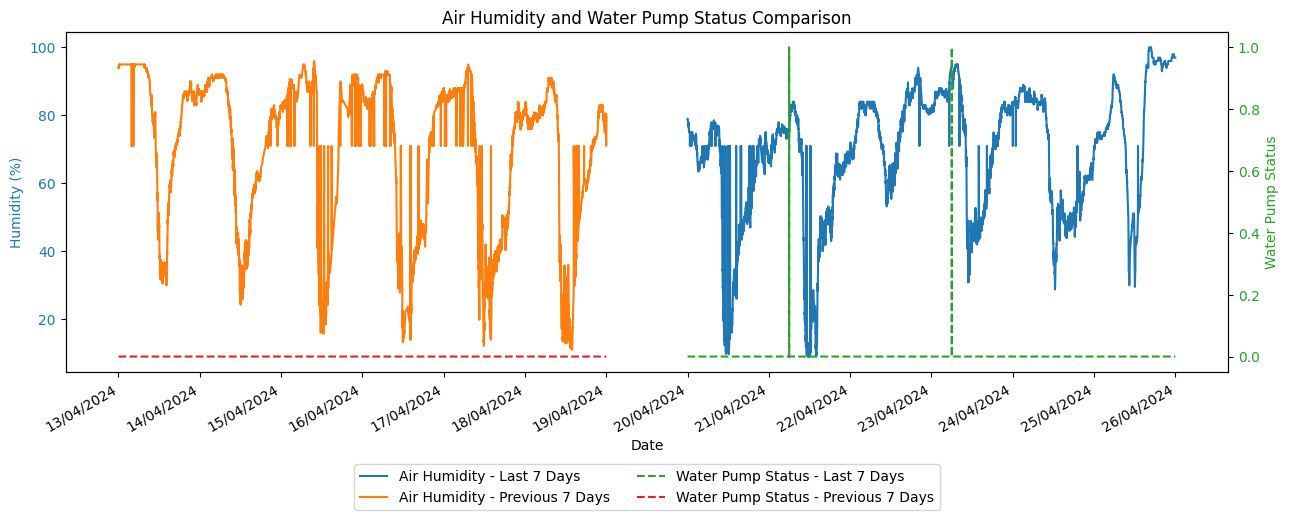

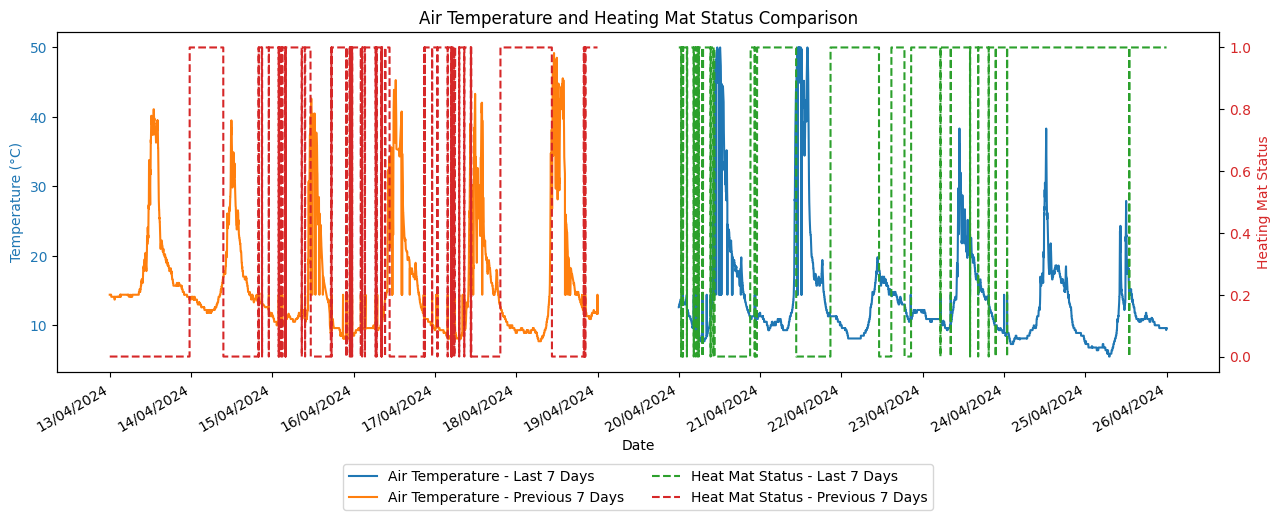

Average Air Temperature (Last 7 Days): 13.80°C
Average Air Temperature (Previous 7 Days): 16.28°C
Average Air Humidity (Last 7 Days): 69.57%
Average Air Humidity (Previous 7 Days): 70.63%

Conclusion:
The average air temperature decreased by 2.48°C compared to the previous week.
The average air humidity decreased by 1.06% compared to the previous week.


In [35]:
def plot_air_conditions_summary(data):
    data['Time'] = pd.to_datetime(data['Time'])
    data.sort_values('Time', inplace=True)

    # Calculate date ranges
    last_date = data['Time'].max()
    start_last_7_days = last_date - pd.Timedelta(days=6)
    start_last_last_7_days = start_last_7_days - pd.Timedelta(days=7)
    end_last_last_7_days = start_last_7_days - pd.Timedelta(days=1)

    # Filter data
    last_7_days_data = data[(data['Time'] >= start_last_7_days) & (data['Time'] <= last_date)].copy()
    last_last_7_days_data = data[(data['Time'] >= start_last_last_7_days) & (data['Time'] <= end_last_last_7_days)].copy()

    # Plotting Air Humidity with Water Pump Status
    fig, ax1 = plt.subplots(figsize=(15, 5))
    l1, = ax1.plot(last_7_days_data['Time'], last_7_days_data['Air Humidity'], label='Air Humidity - Last 7 Days', color='tab:blue')
    l2, = ax1.plot(last_last_7_days_data['Time'], last_last_7_days_data['Air Humidity'], label='Air Humidity - Previous 7 Days', color='tab:orange')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Humidity (%)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    l3, = ax2.plot(last_7_days_data['Time'], last_7_days_data['Water Pump Status'], label='Water Pump Status - Last 7 Days', color='tab:green', linestyle='--')
    l4, = ax2.plot(last_last_7_days_data['Time'], last_last_7_days_data['Water Pump Status'], label='Water Pump Status - Previous 7 Days', color='tab:red', linestyle='--')
    ax2.set_ylabel('Water Pump Status', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.title('Air Humidity and Water Pump Status Comparison')
    plt.gcf().autofmt_xdate()
    plt.legend(handles=[l1, l2, l3, l4], loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
    plt.show()

    # Plotting Air Temperature with Heating Mat Status
    fig, ax1 = plt.subplots(figsize=(15, 5))
    l1, = ax1.plot(last_7_days_data['Time'], last_7_days_data['Air Temperature'], label='Air Temperature - Last 7 Days', color='tab:blue')
    l2, = ax1.plot(last_last_7_days_data['Time'], last_last_7_days_data['Air Temperature'], label='Air Temperature - Previous 7 Days', color='tab:orange')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (°C)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    l3, = ax2.plot(last_7_days_data['Time'], last_7_days_data['Heat Mat Status'], label='Heat Mat Status - Last 7 Days', color='tab:green', linestyle='--')
    l4, = ax2.plot(last_last_7_days_data['Time'], last_last_7_days_data['Heat Mat Status'], label='Heat Mat Status - Previous 7 Days', color='tab:red', linestyle='--')
    ax2.set_ylabel('Heating Mat Status', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.title('Air Temperature and Heating Mat Status Comparison')
    plt.gcf().autofmt_xdate()

    plt.legend(handles=[l1, l2, l3, l4], loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
    plt.show()

    # Calculate daily averages
    avg_temp_last_7 = last_7_days_data['Air Temperature'].mean()
    avg_temp_last_last_7 = last_last_7_days_data['Air Temperature'].mean()
    avg_humidity_last_7 = last_7_days_data['Air Humidity'].mean()
    avg_humidity_last_last_7 = last_last_7_days_data['Air Humidity'].mean()

    # Print
    print(f'Average Air Temperature (Last 7 Days): {avg_temp_last_7:.2f}°C')
    print(f'Average Air Temperature (Previous 7 Days): {avg_temp_last_last_7:.2f}°C')
    print(f'Average Air Humidity (Last 7 Days): {avg_humidity_last_7:.2f}%')
    print(f'Average Air Humidity (Previous 7 Days): {avg_humidity_last_last_7:.2f}%')

    # Conclusion
    temp_change = avg_temp_last_7 - avg_temp_last_last_7
    humidity_change = avg_humidity_last_7 - avg_humidity_last_last_7

    print("\nConclusion:")
    print(f"The average air temperature {'increased' if temp_change > 0 else 'decreased'} by {abs(temp_change):.2f}°C compared to the previous week.")
    print(f"The average air humidity {'increased' if humidity_change > 0 else 'decreased'} by {abs(humidity_change):.2f}% compared to the previous week.")

plot_air_conditions_summary(cleaned_system_data)


## **Section 4: System Events Analysis**
In this critical section, we delve into the operational aspects of your Mini Smart Greenhouse System by analyzing the recorded system events. Events such as system goes offline or actuators being triggered provide invaluable insights into the system's reliability and response to environmental changes. Understanding these events can help identify potential issues and ensure that your system operates optimally.

### **4.1: Offline Events Analysis**
We analyze the durations and timings of these occurrences to identify any patterns or common issues that may suggest equipment malfunctions or external interference.

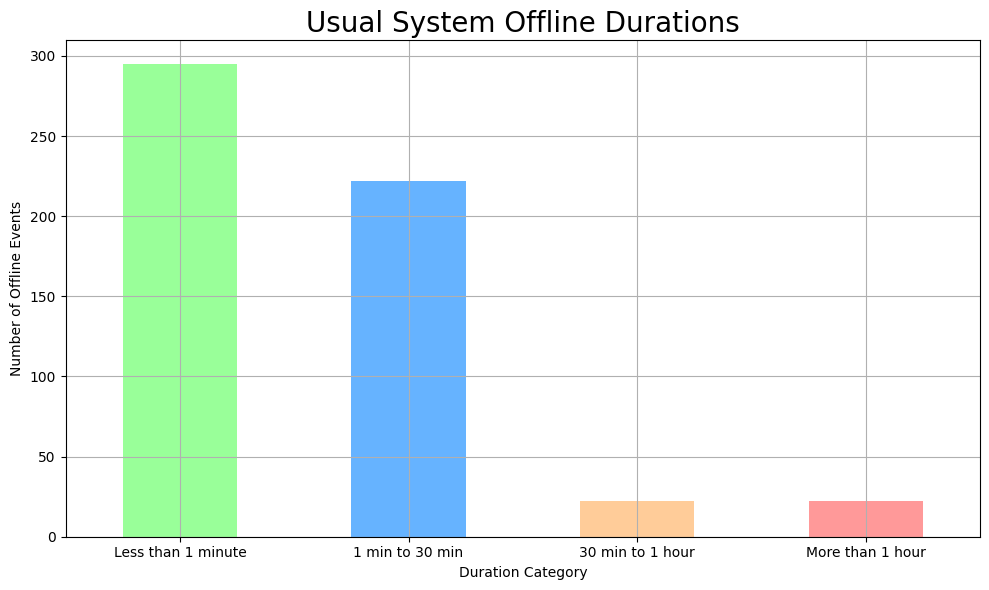

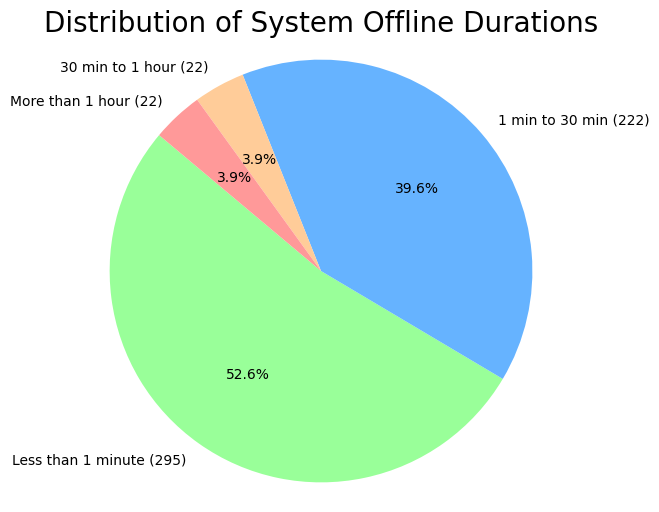

In [26]:
def plot_system_offline_durations(data):
    def categorize_duration(duration):
        if pd.isna(duration):
            return None
        elif duration < pd.Timedelta(minutes=1):
            return 'Less than 1 minute'
        elif duration < pd.Timedelta(minutes=30):
            return '1 min to 30 min'
        elif duration < pd.Timedelta(hours=1):
            return '30 min to 1 hour'
        else:
            return 'More than 1 hour'

    data['Duration Category'] = data['Time Difference'].apply(categorize_duration)

    category_order = ['Less than 1 minute', '1 min to 30 min', '30 min to 1 hour', 'More than 1 hour']

    category_counts = data[data['Event Type'] == 'OFFLINE']['Duration Category'].value_counts().reindex(category_order)

    colors = ['#99ff99', '#66b3ff', '#ffcc99', '#ff9999']

    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color=colors)
    plt.title('Usual System Offline Durations', fontsize=20)
    plt.xlabel('Duration Category')
    plt.ylabel('Number of Offline Events')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    labels = [f'{index} ({count})' for index, count in category_counts.items()]

    plt.figure(figsize=(6, 6))
    plt.pie(category_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Distribution of System Offline Durations', fontsize=20)
    plt.axis('equal')
    plt.show()

plot_system_offline_durations(cleaned_system_events)


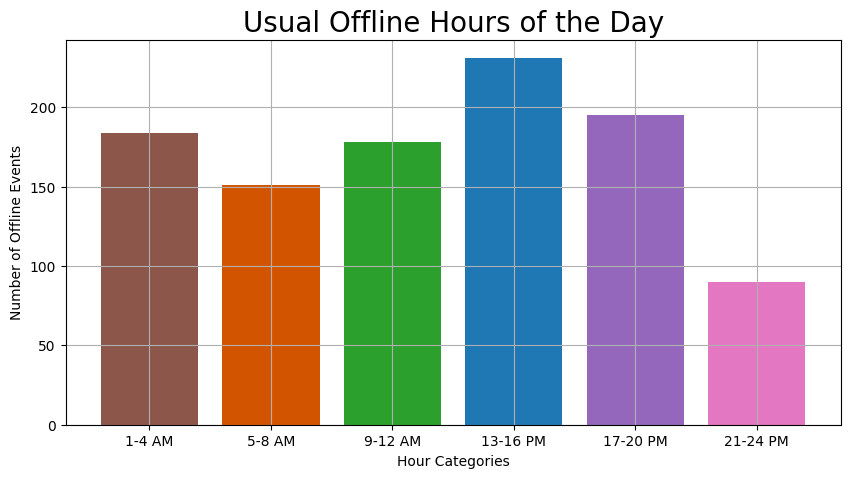

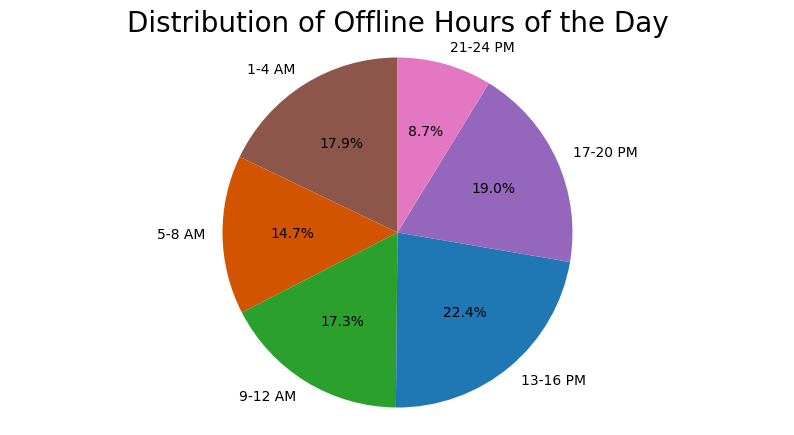

In [27]:
def plot_offline_hours(data):
    hour_categories = {
        '1-4 AM': range(1, 5),
        '5-8 AM': range(5, 9),
        '9-12 AM': range(9, 13),
        '13-16 PM': range(13, 17),
        '17-20 PM': range(17, 21),
        '21-24 PM': range(21, 25)
    }

    colors = ['#8c564b', '#d35400', '#2ca02c', '#1f77b4', '#9467bd', '#e377c2']

    counts = {category: 0 for category in hour_categories.keys()}

    for index, row in data.iterrows():
        hour = row['Time'].hour
        for category, hours in hour_categories.items():
            if hour in hours:
                counts[category] += 1
                break

    plt.figure(figsize=(10, 5))
    plt.bar(counts.keys(), counts.values(), color=colors)
    plt.xlabel('Hour Categories')
    plt.ylabel('Number of Offline Events')
    plt.title('Usual Offline Hours of the Day', fontsize = 20)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal')
    plt.title('Distribution of Offline Hours of the Day', fontsize = 20)
    plt.show()


plot_offline_hours(cleaned_system_events)


### **4.2: Future Event Monitoring Development**
Currently, the Mini Smart Greenhouse System supports tracking for Online and Offline events only since these basic events are crucial for monitoring the system's operational status and ensuring connectivity. Other additional features to enhance the system's event monitoring functions are actively under development. Stay tuned for future updates to taje full advantage of the new features as they become available.